In [15]:
# Import necessary packages here, e.g.
import numpy as np
import pandas as pd 
import xarray as xr # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 2020 Significant Sea Surface Height Along the West Coast 

**Caitlyn McCulloch**    

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->

Surface Ocean waves are driven by one of many processes, one of them is called swells. There has to be a large storm or heavy wind activity that starts a swell, giving enough energy to the water to allow the waves to carry a long distance from the origin and eventually reach the shore. It may originate from heavy winds, but eventually there will be enough energy below the ocean surface that drives these waves to shore. Larger waves have greater erosive power, leading to beach erosion and coastal damage, making wave height data critical for coastal planning and protection strategies. Wave height is a key indicator of weather patterns, particularly during storms, allowing for better predictions of potential hazards. Mariners rely on wave height information to navigate safely, as large waves can significantly impact vessel stability and operations, especially in rough seas.

My research aims to investigate the relationship between seasonality factors and wave heights along the West Coast over the span of one year in 2020. I am really interested in physical oceanography, and why surfers rely so heavily on swell forcasting throughout the year in order to time their sessions at the beach based on ceratin waves traveling from thousands of miles away. I want to know, what are the driving factors of sea surface height along a coastline? Why are waves in the Northern Part of the coast larger than that of the southern west coast? My hypothesis predicts if there is increased storm activity and ocean wind speeds during certain seasons, then these patterns will correlate with higher swell frequencies and elevated sea surface heights impacting the West Coast.   

## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- Dataset 1 - Wave Height Data
  - Downloaded from National Data Buoy Center on 2024-12-01.
  - Data collection process: Data collected by inductive T sensor deployed on stationary mooring buoy at 20 m depth. Data was collected from 3 different sites along the west coast.
  - Relevant variables included: 
    - Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.
    - Time(24 hours per day, for one year)
  - Spatial coverage and resolution: Grays Harbor at 46.857N 124.243W, Point Sur at 36.335N 122.104W, and La Jolla at 32.868N 117.267W.
  - Obstacles to data access: Data had to be accessed as gzip files, for three different locations. also had to clean Nan values in one of the data sets. Dates were in a commented format starting with "#YY" which had to be removed and combined into a datetime string.
  - Temporal coverage and resolution: Collected data was sent from sensor to satellite once every hour each day for one year in 2020. Started from 2015 to present depending on the buoy.
  - URL to datasets: 
      - https://www.ndbc.noaa.gov/station_history.php?station=46239
      - https://www.ndbc.noaa.gov/station_history.php?station=46254
      - https://www.ndbc.noaa.gov/station_history.php?station=46211
<br>
- Dataset 2 - Wind Speed Data
  - Downloaded from U.S. Wind Climatology on 2024-12-01
  - Data collection process: Calculated wind speeds measured at a point 10 meters above the surface with multiple satellites taking pictures of different parts of the globe at the same time.
  - Relevant variables included: 
      - Wind Speed in meters per second
      - Time by month
  - Spatial coverage and resolution: Global coverage and the resolution of the data is approximately 1.9 x 1.9 degrees.
  - Obstacles to data access: in the form of an FTP URL, large data set and unable to download outside of url link. Also multidimentions so it had to open with xarray.
  - Temporal coverage and resolution: Data taken every 6 hours.
  - URL to dataset: https://www.ncei.noaa.gov/access/monitoring/wind/maps/202006

## 1. Analyzing Wave Heights in 2020  

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

In this section we are looking at 3 different locations accross the west coast: Garys Harbor, Washington, Point Sur and La Jolla, California. At these locations, we have buoy data telling us the hourly wave height data, in meters, over the course of one year in 2020. 

In [16]:
url1= "https://www.ndbc.noaa.gov/data/historical/stdmet/46211h2020.txt.gz" # grays harbor
url2 = "https://www.ndbc.noaa.gov/data/historical/stdmet/46239h2020.txt.gz" # point sur
url3 = "https://www.ndbc.noaa.gov/data/historical/stdmet/46254h2020.txt.gz" # la jolla
# as part of commenting your code throughout this section, discuss any problems you encountered and how you solved them

In [5]:
# perform data cleaning steps
# Load data with pandas for grays harbor
graysharbor = pd.read_csv(url1, 
                 compression='gzip', # did this to each data set to uncompress the gzip file and read data
                 delim_whitespace=True, # getting rid of white spaces btwn columns
                 skiprows=[1])
#graysharbor.describe() #hiding this

graysharbor.columns = graysharbor.columns.str.strip().str.replace('#', '', regex=False)

#Check column names
print('Columns after cleaning:', graysharbor.columns.tolist())

#combine date columns into single DateTime column
graysharbor['DateTime'] = pd.to_datetime(
    graysharbor['YY'].astype(str) + '-' +  graysharbor['MM'].astype(str) +'-'+  graysharbor['DD'].astype(str))

# Convert wave height (WVHT) to numeric
graysharbor['WVHT'] = pd.to_numeric(graysharbor['WVHT'], errors='coerce')

# Load data with pandas for point sur
pointsur = pd.read_csv(url2, 
                 compression='gzip', 
                 delim_whitespace=True, 
                 skiprows=[1])
#pointsur.describe() # hiding this

# step 2 clean and prepare data
pointsur.columns = pointsur.columns.str.strip().str.replace('#', '', regex=False)

#Check column names
print('Columns after cleaning:', pointsur.columns.tolist())

#combine date columns into single DateTime column
pointsur['DateTime'] = pd.to_datetime(
    pointsur['YY'].astype(str) + '-' +  pointsur['MM'].astype(str) +'-'+  pointsur['DD'].astype(str))

# Convert wave height (WVHT) to numeric
pointsur['WVHT'] = pd.to_numeric(pointsur['WVHT'], errors='coerce')

# Load data with pandas for la jolla
lajolla = pd.read_csv(url3, 
                 compression='gzip', 
                 delim_whitespace=True, 
                 skiprows=[1])
#lajolla.describe() #hiding this

# step 2 clean and prepare data
lajolla.columns = lajolla.columns.str.strip().str.replace('#', '', regex=False)

#Check column names
print('Columns after cleaning:', lajolla.columns.tolist())

#combine date columns into single DateTime column
lajolla['DateTime'] = pd.to_datetime(
    lajolla['YY'].astype(str) + '-' +  lajolla['MM'].astype(str) +'-'+  lajolla['DD'].astype(str))

# Convert wave height (WVHT) to numeric
lajolla['WVHT'] = pd.to_numeric(lajolla['WVHT'], errors='coerce')

Columns after cleaning: ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
Columns after cleaning: ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
Columns after cleaning: ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']


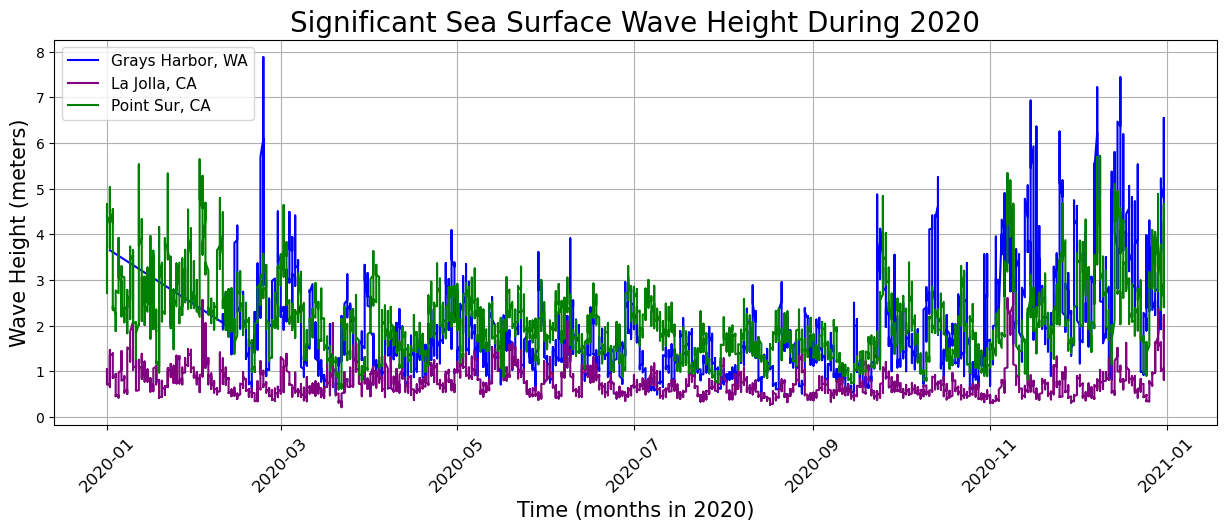

In [4]:
# make and display the figure for all 3 locations to compare wave height
plt.figure(figsize=(15, 5))
plt.plot(graysharbor['DateTime'], graysharbor['WVHT'], color='b', linestyle='-', linewidth=1.5, label="Grays Harbor, WA")
plt.plot(lajolla['DateTime'], lajolla['WVHT'], color='purple', linestyle='-', linewidth=1.5, label="La Jolla, CA")
plt.plot(pointsur['DateTime'], pointsur['WVHT'], color='green', linestyle='-', linewidth=1.5, label="Point Sur, CA")
plt.xlabel("Time (months in 2020)", fontsize=15)
plt.ylabel("Wave Height (meters)", fontsize=15)
plt.title("Significant Sea Surface Wave Height During 2020", fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.grid()
plt.legend(loc='upper left',fontsize=11) #moving legend to upper left 

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** Significant surface wave height in meters over the course of one year. Higher wave heights observed in the winter and fall months and smaller wave heights in the spring and summer months. 

## 2. U-component Wind Speed Data Analysis: Winter and Spring  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

The U-component on wind speed means it is only the speed in the east and west direction. Here we are using xarray and cartopy to clean the data and average the months into two seasons, winter and spring. We are taking the wind speed data and making maps to show where wind speeds, in the east and west direction, are the highest.

In [2]:
# if a new dataset, load data and perform data cleaning steps
# importing the FTP URL
url = "ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis2.dailyavgs/gaussian_grid/uwnd.10m.gauss.2020.nc"

local_filename = "uwnd.10m.gauss.2020.nc"
ds = xr.open_dataset(local_filename)

print(f"File shown as {ds}")

File shown as <xarray.Dataset>
Dimensions:    (level: 1, lat: 94, lon: 192, time: 366, nbnds: 2)
Coordinates:
  * level      (level) float32 10.0
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    uwnd       (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          mean Daily NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    sour

In [5]:
# Split the data by season and find the mean of each month
winter = ds.sel(time=ds.time.dt.month.isin([1, 2, 12])).mean(dim="time")
spring = ds.sel(time=ds.time.dt.month.isin([3, 4, 5])).mean(dim="time")

# call the wind speed data 
variable = ds['uwnd']

# Subset data in order to plot for Winter (Jan-Mar)
winter = variable.sel(time=variable.time.dt.month.isin([1, 2, 3])).mean(dim="time")
west_coast_winter = winter.sel(lat=slice(49, 30), lon=slice(225, 245))

Text(0.5, 1.0, 'Spring (March-May) Average Wind Speed')

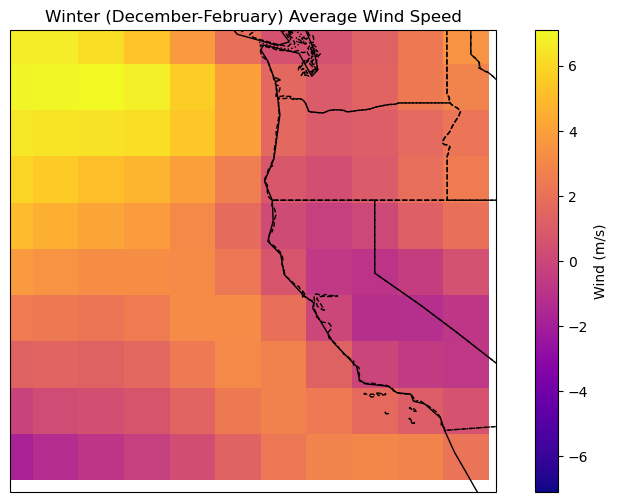

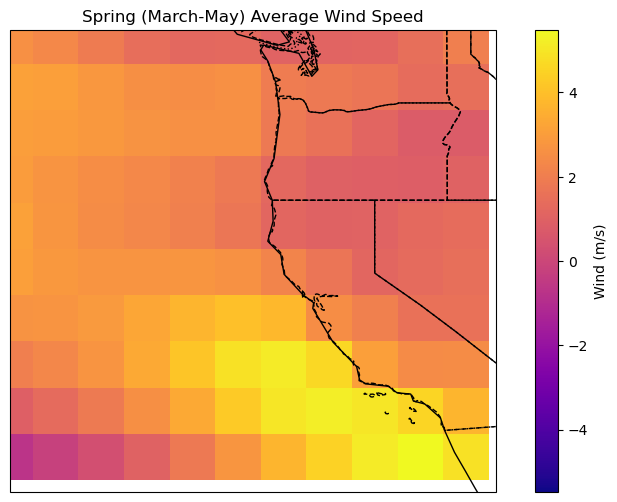

In [14]:
# make and display figure
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
west_coast_winter.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap='plasma', 
    cbar_kwargs={'label': 'Wind (m/s)', 'shrink': 1}
)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.set_extent([-135, -115, 30, 49], crs=ccrs.PlateCarree())
plt.title("Winter (December-February) Average Wind Speed")

spring = variable.sel(time=variable.time.dt.month.isin([4, 5, 6])).mean(dim="time")
west_coast_spring = spring.sel(lat=slice(49, 30), lon=slice(225, 245))

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
west_coast_spring.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap='plasma', 
    cbar_kwargs={'label': 'Wind (m/s)', 'shrink': 1}
)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.set_extent([-135, -115, 30, 49], crs=ccrs.PlateCarree())
plt.title("Spring (March-May) Average Wind Speed")

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** Two maps display wind speeds in the east-west direction. In the winter months, there is high wind speeds in the northern part of the map, closer to Washington State. In the Spring, the wind speeds are higher in the southern part of the map, closer to California.

## 3. U-component Wind Speed Data Analysis: Summer and Fall  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Here we are using xarray and cartopy to clean the data and average the months into two seasons, summer and fall. We are taking the wind speed data and making maps to show where wind speeds, in the east and west direction, are the highest.

In [10]:
# Split the data by each month and take the mean for summer
summer = ds.sel(time=ds.time.dt.month.isin([6, 7, 8])).mean(dim="time")
# Take the month so it can plot directly and then slice the lat and lon values so it's only showing west coast
summer = variable.sel(time=variable.time.dt.month.isin([6, 7, 8])).mean(dim="time")
west_coast_summer = summer.sel(lat=slice(49, 30), lon=slice(225, 245))

# Split the data by each month and take the mean for fall
fall = ds.sel(time=ds.time.dt.month.isin([9, 10, 11])).mean(dim="time")
# Take the month so it can plot directly and then slice the lat and lon values so it's only showing west coast
fall = variable.sel(time=variable.time.dt.month.isin([9, 10, 11])).mean(dim="time")
west_coast_fall = fall.sel(lat=slice(49, 30), lon=slice(225, 245))


Text(0.5, 1.0, 'Fall (September-Nov) Average Wind Speed')

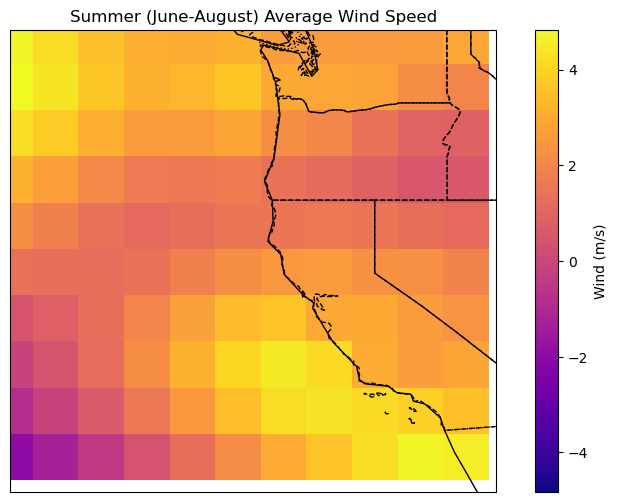

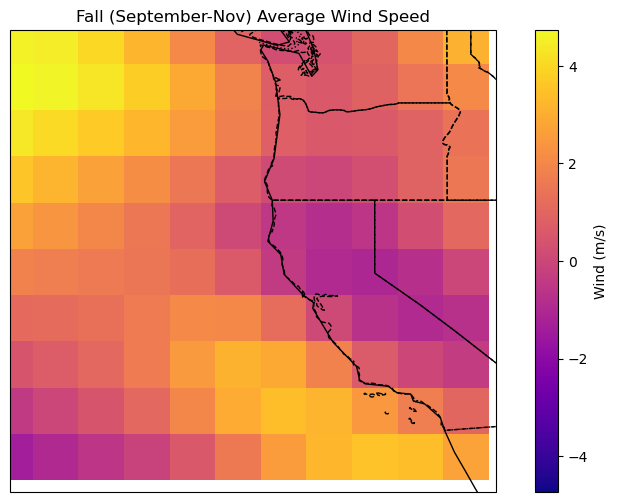

In [12]:
# make and display figure
# Summer Map
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree()) #map projection
west_coast_summer.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap='plasma', # map color
    cbar_kwargs={'label': 'Wind (m/s)', 'shrink': 1} #size of the color and label
)
ax.coastlines(resolution='110m') #adding coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.set_extent([-135, -115, 30, 49], crs=ccrs.PlateCarree())
plt.title("Summer (June-August) Average Wind Speed") # proper label

# Fall Map
plt.figure(figsize=(10, 6)) 
ax = plt.axes(projection=ccrs.PlateCarree())
west_coast_fall.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cmap='plasma', 
    cbar_kwargs={'label': 'Wind (m/s)', 'shrink': 1}
)
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.set_extent([-135, -115, 30, 49], crs=ccrs.PlateCarree())
plt.title("Fall (September-Nov) Average Wind Speed")


<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3 Caption:** Two maps display wind speeds in the east-west direction. In the summer months, there is high wind speeds in the northern part of the map and southern part of the map, closer to Washington State. In the fall, the wind speeds are highest back in the northern part of the map, closer to Washington.

## Discussion
**Interpretation of Results:**  *(Write ~1 paragraph below)*

These results confirm a strong correlation between wind speeds and wave heights, supporting my hypothesis. Data shows that larger waves occur on the Washington and Northern California coasts during winter months, coinciding with more frequent storms and higher surface winds. In contrast, wave heights decrease in spring and summer due to lower and less consistent wind speeds. While other factors influence wave heights, these findings highlight the significant role of seasonality.

<!-- Summarize what you learned from each data analysis section/figure. Discuss key insights and conclusions regarding your research question. Do your results support or contradict your hypothesis? -->

**Limitations and Future Work:**  *(Write ~1 paragraph below)*

The limitations in my analysis start with lack of other weathering factors that influence wave height, such as atmospheric pressure and other storms that go along with heavy winds. These locations I also picked have different coastal topography, which could effect the waves break along the shore and their annual sizes. I could also look at other years of wave height data to see climate changes and how increased global warming can effect wave height data. Sea level rises can also account for more violent waves and coastal erosion, and in the future this is a large factor I would like to study and see how that has changed. Data collection for future projects with this idea could include more locations with similar coastlines and how sea level rises correlate with these wind and storm factors.
<!-- Identify limitations in your analysis. Discuss any factors that may have impacted the validity or reliability of your results (e.g., data quality, sample size, assumptions). -->
<!-- What next steps could you or another researcher take to continue investigating this research question? Suggest ideas for further research, data collection, or alternative methodologies that could enhance understanding of the topic. -->

## References  

*Cite all papers, websites, or other resources you referenced in your project. Use a consistent citation style (e.g., APA, MLA, Chicago).*

1. **Climate.gov.** (12/01/2024). *Average Wind Speeds - Map Viewer.* https://www.climate.gov/maps-data/dataset/average-wind-speeds-map-viewer 

2. **National Buoy Data Center.** (12/01/2024). *HOME- Station ID* https://www.ndbc.noaa.gov

3. **Climate.gov.** (12/01/2024). *U.S. Wind Map Climatology.* https://www.ncei.noaa.gov/access/monitoring/wind/maps/202006  
